# importando bibliotecas

In [9]:
import cv2

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy

In [11]:
#Lendo os dados com pandas 
dados = pd.read_csv("winequality-red.csv")

#exibindo os cinco primeiros do dataset
dados.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
# Adicionando nome ID na primeira coluna 
dados.rename_axis("ID", axis = 'columns', inplace = True)
dados.head()

ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
# criando uma matriz X com os valores do data frame
X = dados.iloc[:,0:-1].values # exceto a coluna dos IDs e da classe

In [14]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [15]:
#Vamos converter os recursos normalizados em um formato tabular com a ajuda do DataFrame
feat_cols = ['feature'+str(i) for i in range(X.shape[1])]
normalised_dados = pd.DataFrame(X,columns=feat_cols)
normalised_dados.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308
1598,-1.332702,-1.216849,1.021999,0.752894,-0.434990,0.203223,-0.135861,-0.666057,0.511130,0.010924,0.541630


In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_dados = pca.fit_transform(normalised_dados)

In [17]:
pca_df = pd.DataFrame(data = pca_dados, columns = ['principal componente 1', 'principal componente 2'])
finalDf = pd.concat([pca_df, dados[['quality']]], axis = 1)

In [18]:
finalDf

,principal componente 1,principal componente 2,quality
0,-1.619530,0.450950,5
1,-0.799170,1.856553,5
2,-0.748479,0.882039,5
3,2.357673,-0.269976,6
4,-1.619530,0.450950,5
...,...,...,...
1594,-2.150500,0.814286,5
1595,-2.214496,0.893101,6
1596,-1.456129,0.311746,6
1597,-2.270518,0.979791,5


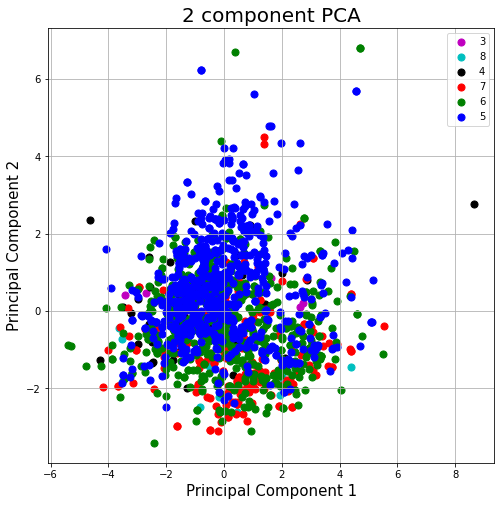

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [3, 8, 4, 7, 6, 5]
colors = ['m', 'c', 'k', 'r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['quality'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 1'], 
               finalDf.loc[indicesToKeep, 'principal componente 2'], 
               c = color, s = 50)
ax.legend(targets)
ax.grid()

In [20]:
pca_dados = pca.fit(normalised_dados)
cov = pca_dados.get_covariance()

In [21]:
from scipy import linalg as LA

values, vectors = LA.eig(cov)

In [22]:
values = np.around(values, 4)

In [23]:
print('Matriz de covariância: ')
covariance_pd = pd.DataFrame(cov)
display(covariance_pd)

Matriz de covariância: 


,0,1,2,3,4,5,6,7,8,9,10
0,1.263152,-0.322840,0.573992,0.136243,0.232412,-0.114778,-0.051359,0.438804,-0.523804,0.294887,-0.081122
1,-0.322840,0.898459,-0.322244,0.009519,-0.071994,0.199325,0.184012,-0.148754,0.257275,-0.154267,-0.068246
2,0.573992,-0.322244,1.217190,0.112913,0.211410,-0.139292,-0.082528,0.401883,-0.496710,0.281642,-0.053901
3,0.136243,0.009519,0.112913,0.809801,0.126435,0.163582,0.204062,0.221011,-0.153820,0.073584,-0.173001
4,0.232412,-0.071994,0.211410,0.126435,0.801753,0.077317,0.118665,0.248145,-0.225546,0.118617,-0.130764
5,-0.114778,0.199325,-0.139292,0.163582,0.077317,1.000554,0.367258,0.116649,0.042989,-0.045758,-0.240477
6,-0.051359,0.184012,-0.082528,0.204062,0.118665,0.367258,1.075204,0.190689,-0.020365,-0.013052,-0.284229
7,0.438804,-0.148754,0.401883,0.221011,0.248145,0.116649,0.190689,1.114073,-0.420484,0.222950,-0.222995
8,-0.523804,0.257275,-0.496710,-0.153820,-0.225546,0.042989,-0.020365,-0.420484,1.132946,-0.259897,0.117724
9,0.294887,-0.154267,0.281642,0.073584,0.118617,-0.045758,-0.013052,0.222950,-0.259897,0.809876,-0.048713


In [24]:
print('Autovalores: ')
values_pd = pd.DataFrame(values)
display(values_pd)

Autovalores: 


,0
0,3.1011+0.0000j
1,1.9271+0.0000j
2,0.6643+0.0000j
3,0.6643+0.0000j
4,0.6643+0.0000j
5,0.6643+0.0000j
6,0.6643+0.0000j
7,0.6643+0.0000j
8,0.6643+0.0000j
9,0.6643+0.0000j


In [25]:
print('Autovetores: ')
vectors_pd = pd.DataFrame(vectors)
display(vectors_pd)

Autovetores: 


,0,1,2,3,4,5,6,7,8,9,10
0,-0.489314,-0.110503,0.420885,-0.402403,0.134875,-0.035388,-0.052801,-0.053850,0.000326,-0.086813,0.008123
1,0.238584,0.274930,-0.697833,-0.870015,-0.080930,0.044324,0.046879,0.060499,-0.065757,0.094442,0.007086
2,-0.463632,-0.151791,-0.414373,-0.150015,0.174959,0.129716,-0.010346,-0.414391,-0.115610,-0.015044,0.133483
3,-0.146107,0.272080,-0.005220,0.040593,0.571709,0.636044,0.018873,0.224972,-0.440499,-0.278194,-0.324104
4,-0.212247,0.148052,-0.099896,-0.004312,-0.102377,0.212009,-0.475715,0.293222,0.000675,0.538284,-0.159940
5,0.036158,0.513567,0.193054,0.113158,0.054984,-0.237976,-0.430378,0.155354,-0.035592,-0.390941,0.574692
6,-0.023575,0.569487,0.126500,0.071252,-0.406036,-0.012001,0.210747,-0.485129,-0.255471,0.443748,0.050672
7,-0.395353,0.233575,0.000649,0.186331,0.102690,-0.265211,0.651040,0.545868,-0.113408,0.262356,0.076805
8,0.438520,0.006711,0.277394,0.042589,0.600319,-0.186267,0.131076,0.134557,-0.232466,0.176242,-0.322832
9,-0.242921,-0.037554,-0.151176,-0.016930,-0.089913,-0.601764,-0.308660,0.133224,-0.165084,-0.026935,-0.291518


In [26]:
explained_variance = pca_dados.explained_variance_
explained_variance

array([3.10107182, 1.92711489])

In [27]:
n_components = 2
pca_test = PCA(n_components)
pca_dados_test = pca_test.fit_transform(normalised_dados)

In [28]:
#No exemplo abaixo, nosso conjunto de dados contém 10 recursos, mas selecionamos apenas os 2 primeiros componente e eles explicam 45% da variância total.

total_var = pca_test.explained_variance_ratio_.sum() * 100

print(total_var)

45.682201184294094


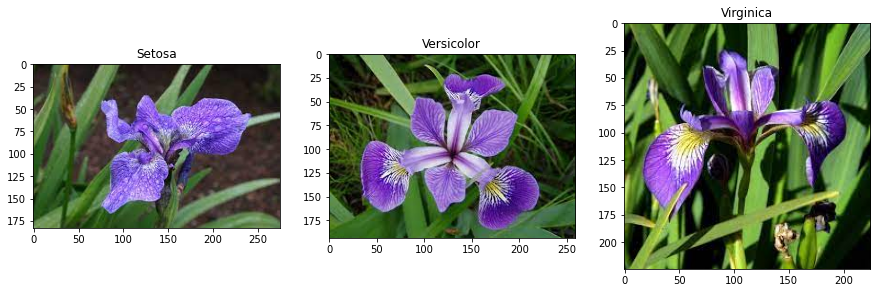

In [29]:
import cv2

setosa = cv2.cvtColor(cv2.imread('setosa.jpg'), cv2.COLOR_BGR2RGB)
versicolor = cv2.cvtColor(cv2.imread('versicolor.jpg'), cv2.COLOR_BGR2RGB)
virginica = cv2.cvtColor(cv2.imread('virginica.jpg'), cv2.COLOR_BGR2RGB)

# Plotando as imagens 
fig = plt.figure (figsize = (15, 7.2)) 
fig.add_subplot (131) 
plt.title ("Setosa") 
plt.imshow (setosa)
fig.add_subplot (132) 
plt.title ("Versicolor") 
plt.imshow (versicolor)
fig.add_subplot (133) 
plt.title ("Virginica") 
plt.imshow (virginica)
plt.show ()

In [30]:
print(setosa.shape)
print(versicolor.shape)
print(virginica.shape)

(183, 275, 3)
(194, 259, 3)
(225, 225, 3)


In [31]:
# Convertendo do channel 3(rgb) para 1 channel(gray)
gray_setosa = cv2.cvtColor(setosa, cv2.COLOR_BGR2GRAY)
gray_versicolor = cv2.cvtColor(versicolor, cv2.COLOR_BGR2GRAY)
gray_virginica = cv2.cvtColor(virginica, cv2.COLOR_BGR2GRAY)
                              
print(gray_setosa.shape)
print(gray_versicolor.shape)
print(gray_virginica.shape)

(183, 275)
(194, 259)
(225, 225)


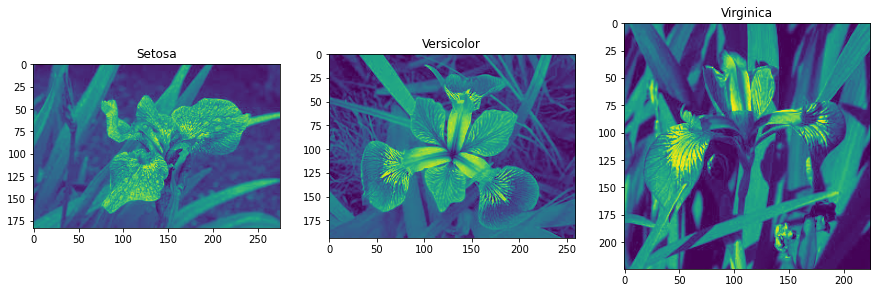

In [32]:
# Plotando as imagens 
fig = plt.figure (figsize = (15, 7.2)) 
fig.add_subplot (131) 
plt.title ("Setosa") 
plt.imshow (gray_setosa)
fig.add_subplot (132) 
plt.title ("Versicolor") 
plt.imshow (gray_versicolor)
fig.add_subplot (133) 
plt.title ("Virginica") 
plt.imshow (gray_virginica)
plt.show ()

In [33]:
gray_setosa_df = pd.DataFrame(data = gray_setosa)
gray_versicolor_df = pd.DataFrame(data = gray_versicolor)
gray_virginica_df = pd.DataFrame(data = gray_virginica)

In [34]:
df_setosa = gray_setosa/255
df_versicolor = gray_versicolor/255
df_virginica = gray_virginica/255

In [35]:
pca_setosa_50 = PCA(n_components=50)
pca_versicolor_50 = PCA(n_components=50)
pca_virginica_50 = PCA(n_components=50)

pca_setosa_20 = PCA(n_components=20)
pca_versicolor_20 = PCA(n_components=20)
pca_virginica_20 = PCA(n_components=20)

pca_setosa_10 = PCA(n_components=10)
pca_versicolor_10 = PCA(n_components=10)
pca_virginica_10 = PCA(n_components=10)

pca_setosa_50.fit(df_setosa)
trans_pca_setosa_50 = pca_setosa_50.transform(df_setosa)

pca_versicolor_50.fit(df_versicolor)
trans_pca_versicolor_50 = pca_versicolor_50.transform(df_versicolor)

pca_virginica_50.fit(df_virginica)
trans_pca_virginica_50 = pca_virginica_50.transform(df_virginica)


pca_setosa_20.fit(df_setosa)
trans_pca_setosa_20 = pca_setosa_20.transform(df_setosa)

pca_versicolor_20.fit(df_versicolor)
trans_pca_versicolor_20 = pca_versicolor_20.transform(df_versicolor)

pca_virginica_20.fit(df_virginica)
trans_pca_virginica_20 = pca_virginica_20.transform(df_virginica)


pca_setosa_10.fit(df_setosa)
trans_pca_setosa_10 = pca_setosa_10.transform(df_setosa)

pca_versicolor_10.fit(df_versicolor)
trans_pca_versicolor_10 = pca_versicolor_10.transform(df_versicolor)

pca_virginica_10.fit(df_virginica)
trans_pca_virginica_10 = pca_virginica_10.transform(df_virginica)

In [36]:
print(trans_pca_setosa_50.shape)
print(trans_pca_versicolor_50.shape)
print(trans_pca_virginica_50.shape)

(183, 50)
(194, 50)
(225, 50)


In [37]:
#verificar a soma das razões de variância explicadas dos 50 componentes do PCA
#usando apenas 50 componentes, podemos manter mais de 94% da variância dos dados.

print(f"Setosa : {sum(pca_setosa_50.explained_variance_ratio_)}")
print(f"Versicolor : {sum(pca_versicolor_50.explained_variance_ratio_)}")
print(f"Virginica : {sum(pca_virginica_50.explained_variance_ratio_)}")

Setosa : 0.9715654453135676
Versicolor : 0.9470512979168727
Virginica : 0.9725795514875785


In [38]:
setosa_arr_50 = pca_setosa_50.inverse_transform (trans_pca_setosa_50)
versicolor_arr_50 = pca_versicolor_50.inverse_transform (trans_pca_versicolor_50)
virginica_arr_50 = pca_virginica_50.inverse_transform (trans_pca_virginica_50)

setosa_arr_20 = pca_setosa_20.inverse_transform (trans_pca_setosa_20)
versicolor_arr_20 = pca_versicolor_20.inverse_transform (trans_pca_versicolor_20)
virginica_arr_20 = pca_virginica_20.inverse_transform (trans_pca_virginica_20)

setosa_arr_10 = pca_setosa_10.inverse_transform (trans_pca_setosa_10)
versicolor_arr_10 = pca_versicolor_10.inverse_transform (trans_pca_versicolor_10)
virginica_arr_10 = pca_virginica_10.inverse_transform (trans_pca_virginica_10)

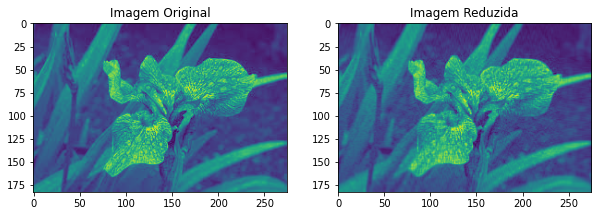

In [39]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121) 
plt.title("Imagem Original") 
plt.imshow(gray_setosa)
fig.add_subplot(122) 
plt.title("Imagem Reduzida") 
plt.imshow(setosa_arr_50)
plt.show()

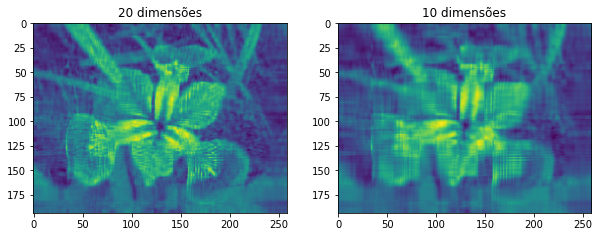

In [40]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121) 
plt.title("20 dimensões") 
plt.imshow(versicolor_arr_20)
fig.add_subplot(122) 
plt.title("10 dimensões") 
plt.imshow(versicolor_arr_10)
plt.show()

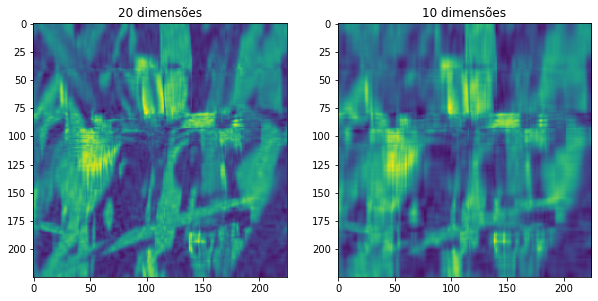

In [41]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121) 
plt.title("20 dimensões") 
plt.imshow(virginica_arr_20)
fig.add_subplot(122) 
plt.title("10 dimensões") 
plt.imshow(virginica_arr_10)
plt.show()

In [42]:
cov_setosa = pca_setosa_50.get_covariance()
cov_versicolor = pca_versicolor_50.get_covariance()
cov_virginica = pca_virginica_50.get_covariance()

In [43]:
values_setosa, vectors_setosa = LA.eig(cov_setosa)
values_versicolor, vectors_versicolor = LA.eig(cov_versicolor)
values_virginica, vectors_virginica = LA.eig(cov_virginica)

In [44]:
print('Matriz de covariância da imagem setosa: ')
covariance_setosa_pd = pd.DataFrame(cov_setosa)
display(covariance_setosa_pd)

Matriz de covariância da imagem setosa: 


,0,1,2,3,4,5,6,7,8,9,...,265,266,267,268,269,270,271,272,273,274
0,0.013550,0.011547,0.010743,0.009427,0.008165,0.007342,0.006681,0.006166,0.006077,0.006225,...,0.000991,0.000884,0.000842,0.000882,0.001016,0.001135,0.001134,0.001114,0.001143,0.001217
1,0.011547,0.014741,0.013455,0.012248,0.010691,0.009818,0.009123,0.008437,0.008313,0.008272,...,0.003336,0.003197,0.003234,0.003403,0.003570,0.003628,0.003547,0.003404,0.003428,0.003500
2,0.010743,0.013455,0.017189,0.014685,0.013043,0.012063,0.011310,0.010520,0.010336,0.010045,...,0.005332,0.005199,0.005308,0.005566,0.005717,0.005690,0.005527,0.005167,0.005165,0.005213
3,0.009427,0.012248,0.014685,0.016580,0.013649,0.012741,0.011894,0.011068,0.010766,0.010195,...,0.005977,0.005866,0.005972,0.006206,0.006279,0.006163,0.005948,0.005311,0.005247,0.005225
4,0.008165,0.010691,0.013043,0.013649,0.015179,0.013010,0.012184,0.011177,0.010708,0.009928,...,0.006745,0.006647,0.006752,0.006969,0.006978,0.006775,0.006506,0.005620,0.005485,0.005375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0.001135,0.003628,0.005690,0.006163,0.006775,0.007929,0.008102,0.007285,0.006327,0.005700,...,0.016710,0.016805,0.017245,0.017758,0.017698,0.018895,0.016508,0.015046,0.014695,0.014292
271,0.001134,0.003547,0.005527,0.005948,0.006506,0.007624,0.007839,0.007096,0.006145,0.005531,...,0.015900,0.016026,0.016482,0.017019,0.017023,0.016508,0.017813,0.014679,0.014360,0.013993
272,0.001114,0.003404,0.005167,0.005311,0.005620,0.006636,0.006904,0.006243,0.005310,0.004750,...,0.014020,0.014188,0.014672,0.015247,0.015377,0.015046,0.014679,0.015840,0.013805,0.013536
273,0.001143,0.003428,0.005165,0.005247,0.005485,0.006461,0.006735,0.006093,0.005143,0.004613,...,0.013551,0.013747,0.014248,0.014829,0.014984,0.014695,0.014360,0.013805,0.015427,0.013388


In [45]:
print('Matriz de covariância da imagem versicolor: ')
covariance_versicolor_pd = pd.DataFrame(cov_versicolor)
display(covariance_versicolor_pd)

Matriz de covariância da imagem versicolor: 


,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
0,0.018916,0.015269,0.014297,0.013507,0.012673,0.012078,0.011926,0.011731,0.011036,0.010552,...,0.005506,0.004813,0.004288,0.004336,0.004646,0.004835,0.004912,0.005662,0.005587,0.005453
1,0.015269,0.019361,0.016149,0.015083,0.013851,0.013280,0.012667,0.012281,0.011359,0.010676,...,0.005496,0.004921,0.004398,0.004308,0.004531,0.004839,0.005065,0.005768,0.005589,0.005347
2,0.014297,0.016149,0.020488,0.016834,0.015288,0.014232,0.013310,0.013025,0.012283,0.011475,...,0.005149,0.004666,0.004285,0.004283,0.004548,0.004942,0.005231,0.005640,0.005385,0.005057
3,0.013507,0.015083,0.016834,0.020279,0.016379,0.014942,0.013684,0.013445,0.012798,0.011918,...,0.005005,0.004607,0.004340,0.004446,0.004746,0.005058,0.005238,0.005594,0.005364,0.005056
4,0.012673,0.013851,0.015288,0.016379,0.020159,0.015994,0.014264,0.013788,0.013077,0.012152,...,0.005094,0.004782,0.004547,0.004675,0.004908,0.005012,0.005047,0.005357,0.005210,0.004982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,0.004835,0.004839,0.004942,0.005058,0.005012,0.004551,0.003858,0.004229,0.003961,0.004419,...,0.006161,0.006639,0.007185,0.007730,0.008210,0.011504,0.008540,0.008403,0.008214,0.007967
255,0.004912,0.005065,0.005231,0.005238,0.005047,0.004505,0.003860,0.004321,0.003914,0.004281,...,0.005979,0.006466,0.006977,0.007459,0.008021,0.008540,0.011948,0.008919,0.008747,0.008526
256,0.005662,0.005768,0.005640,0.005594,0.005357,0.004813,0.004086,0.004484,0.004049,0.004282,...,0.006147,0.006767,0.007208,0.007441,0.007841,0.008403,0.008919,0.013464,0.010258,0.010056
257,0.005587,0.005589,0.005385,0.005364,0.005210,0.004780,0.004155,0.004573,0.004149,0.004338,...,0.006116,0.006693,0.007090,0.007282,0.007658,0.008214,0.008747,0.010258,0.013232,0.010066


In [46]:
print('Matriz de covariância da imagem virginica: ')
covariance_virginica_pd = pd.DataFrame(cov_virginica)
display(covariance_virginica_pd)

Matriz de covariância da imagem virginica: 


,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
0,0.034042,0.031167,0.026580,0.019984,0.015368,0.012789,0.011457,0.010692,0.009890,0.009785,...,-0.021018,-0.020350,-0.019749,-0.018036,-0.014726,-0.010955,-0.008569,-0.007961,-0.007682,-0.006716
1,0.031167,0.036392,0.032643,0.026061,0.020720,0.016715,0.014704,0.014353,0.013936,0.014035,...,-0.019960,-0.019468,-0.018676,-0.017012,-0.014248,-0.011428,-0.009637,-0.008622,-0.007613,-0.005998
2,0.026580,0.032643,0.035834,0.029684,0.024763,0.019553,0.016311,0.015839,0.015380,0.015080,...,-0.016831,-0.016888,-0.016531,-0.015254,-0.012888,-0.010949,-0.010149,-0.009174,-0.007583,-0.005597
3,0.019984,0.026061,0.029684,0.030840,0.026751,0.022053,0.017942,0.016381,0.015203,0.014558,...,-0.011029,-0.012080,-0.012628,-0.012167,-0.010352,-0.009141,-0.009194,-0.008415,-0.006511,-0.004204
4,0.015368,0.020720,0.024763,0.026751,0.029621,0.025806,0.022198,0.019624,0.017273,0.015893,...,-0.005490,-0.007086,-0.008187,-0.008497,-0.007399,-0.006663,-0.006993,-0.006420,-0.004703,-0.002390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,-0.010955,-0.011428,-0.010949,-0.009141,-0.006663,-0.002442,0.001846,0.004524,0.005263,0.005186,...,0.023855,0.025159,0.027202,0.029123,0.029422,0.029929,0.025263,0.022195,0.020472,0.017649
221,-0.008569,-0.009637,-0.010149,-0.009194,-0.006993,-0.002768,0.001421,0.003910,0.004583,0.005079,...,0.018225,0.019014,0.020191,0.021582,0.023097,0.025263,0.028271,0.025437,0.023578,0.020264
222,-0.007961,-0.008622,-0.009174,-0.008415,-0.006420,-0.002463,0.001655,0.004133,0.004975,0.006305,...,0.016612,0.017294,0.018023,0.018676,0.019631,0.022195,0.025437,0.028785,0.026854,0.024230
223,-0.007682,-0.007613,-0.007583,-0.006511,-0.004703,-0.001284,0.002706,0.005353,0.006410,0.008329,...,0.017236,0.017982,0.018706,0.018988,0.019034,0.020472,0.023578,0.026854,0.030552,0.027424


In [47]:
print('Autovalores da imagem setosa: ')
values_setosa_pd = pd.DataFrame(values_setosa)
display(values_setosa_pd)

Autovalores da imagem setosa: 


,0
0,2.826393+0.000000j
1,1.319297+0.000000j
2,0.967759+0.000000j
3,0.452426+0.000000j
4,0.415789+0.000000j
...,...
270,0.001809+0.000000j
271,0.001809+0.000000j
272,0.001809-0.000000j
273,0.001809+0.000000j


In [48]:
print('Autovalores da imagem versicolor: ')
values_versicolor_pd = pd.DataFrame(values_versicolor)
display(values_versicolor_pd)

Autovalores da imagem versicolor: 


,0
0,2.500142+0.000000j
1,0.888983+0.000000j
2,0.777150+0.000000j
3,0.538449+0.000000j
4,0.422006+0.000000j
...,...
254,0.003050+0.000000j
255,0.003050+0.000000j
256,0.003050-0.000000j
257,0.003050+0.000000j


In [49]:
print('Autovalores da imagem virginica: ')
values_virginica_pd = pd.DataFrame(values_virginica)
display(values_virginica_pd)

Autovalores da imagem virginica: 


,0
0,2.644029+0.000000j
1,2.010913+0.000000j
2,0.809791+0.000000j
3,0.767512+0.000000j
4,0.721299+0.000000j
...,...
220,0.001766+0.000000j
221,0.001766+0.000000j
222,0.001766+0.000000j
223,0.001766+0.000000j


In [50]:
print('Autovetores da imagem setosa: ')
vectors_setosa_pd = pd.DataFrame(vectors_setosa)
display(vectors_setosa_pd)

Autovetores da imagem setosa: 


,0,1,2,3,4,5,6,7,8,9,...,265,266,267,268,269,270,271,272,273,274
0,0.033623+0.000000j,-0.022834+0.000000j,-0.022332+0.000000j,-0.075542+0.000000j,0.030186+0.000000j,0.054586+0.000000j,-0.044324+0.000000j,0.011598+0.000000j,-0.008046+0.000000j,-0.028130+0.000000j,...,-0.078583+0.000008j,-0.078583-0.000008j,-0.017249-0.002020j,-0.017249+0.002020j,-0.049296+0.000000j,-0.048327+0.000000j,-0.048613+0.010046j,-0.048613-0.010046j,-0.052448+0.000000j,-0.059206+0.000000j
1,0.042378+0.000000j,-0.032809+0.000000j,-0.031618+0.000000j,-0.062941+0.000000j,0.033819+0.000000j,0.034362+0.000000j,-0.010675+0.000000j,0.005257+0.000000j,0.001708+0.000000j,-0.021606+0.000000j,...,-0.004560-0.003513j,-0.004560+0.003513j,0.002719-0.003389j,0.002719+0.003389j,-0.004683+0.000000j,0.005033+0.000000j,0.002986-0.001093j,0.002986+0.001093j,-0.001632+0.000000j,0.010037+0.000000j
2,0.049643+0.000000j,-0.036937+0.000000j,-0.038048+0.000000j,-0.046801+0.000000j,0.035587+0.000000j,0.012261+0.000000j,0.019249+0.000000j,-0.011415+0.000000j,-0.005942+0.000000j,-0.023699+0.000000j,...,0.000146+0.001760j,0.000146-0.001760j,-0.004524-0.007194j,-0.004524+0.007194j,-0.006586+0.000000j,-0.008186+0.000000j,0.002990+0.000295j,0.002990-0.000295j,0.002084+0.000000j,0.015180+0.000000j
3,0.049649+0.000000j,-0.029157+0.000000j,-0.038105+0.000000j,-0.037358+0.000000j,0.034255+0.000000j,0.001600+0.000000j,0.030174+0.000000j,-0.030006+0.000000j,-0.027656+0.000000j,-0.038651+0.000000j,...,-0.006535+0.002691j,-0.006535-0.002691j,-0.010616+0.002993j,-0.010616-0.002993j,-0.005787+0.000000j,-0.025392+0.000000j,-0.017658+0.005814j,-0.017658-0.005814j,-0.017035+0.000000j,0.000034+0.000000j
4,0.046520+0.000000j,-0.018553+0.000000j,-0.039436+0.000000j,-0.035110+0.000000j,0.030885+0.000000j,-0.002809+0.000000j,0.042185+0.000000j,-0.034767+0.000000j,-0.031030+0.000000j,-0.054505+0.000000j,...,-0.036512-0.004665j,-0.036512+0.004665j,-0.020839+0.002842j,-0.020839-0.002842j,-0.028198+0.000000j,-0.026717+0.000000j,-0.026759+0.002354j,-0.026759-0.002354j,-0.018710+0.000000j,-0.024616+0.000000j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0.016486+0.000000j,0.003481+0.000000j,-0.080870+0.000000j,0.017412+0.000000j,-0.027191+0.000000j,0.044059+0.000000j,0.122948+0.000000j,-0.086230+0.000000j,0.064937+0.000000j,0.051956+0.000000j,...,0.027163+0.022901j,0.027163-0.022901j,0.089142-0.003947j,0.089142+0.003947j,0.041894+0.000000j,0.127006+0.000000j,0.058407+0.007679j,0.058407-0.007679j,0.052255+0.000000j,-0.007208+0.000000j
271,0.015002+0.000000j,0.002271+0.000000j,-0.077569+0.000000j,0.015947+0.000000j,-0.022709+0.000000j,0.042037+0.000000j,0.114130+0.000000j,-0.086766+0.000000j,0.063561+0.000000j,0.052654+0.000000j,...,0.191675-0.010127j,0.191675+0.010127j,0.107179-0.062884j,0.107179+0.062884j,0.099111+0.000000j,0.152925+0.000000j,0.048338+0.023594j,0.048338-0.023594j,-0.036621+0.000000j,0.131078+0.000000j
272,0.010769+0.000000j,-0.005980+0.000000j,-0.070657+0.000000j,0.011778+0.000000j,-0.017076+0.000000j,0.032487+0.000000j,0.104547+0.000000j,-0.074988+0.000000j,0.072733+0.000000j,0.056820+0.000000j,...,-0.195515+0.009442j,-0.195515-0.009442j,-0.132791+0.026995j,-0.132791-0.026995j,-0.045048+0.000000j,-0.169585+0.000000j,-0.136688-0.049057j,-0.136688+0.049057j,-0.111131+0.000000j,-0.150763+0.000000j
273,0.010549+0.000000j,-0.007870+0.000000j,-0.068495+0.000000j,0.010163+0.000000j,-0.017525+0.000000j,0.032246+0.000000j,0.100391+0.000000j,-0.073748+0.000000j,0.071706+0.000000j,0.058080+0.000000j,...,-0.102138+0.006374j,-0.102138-0.006374j,-0.014876+0.038387j,-0.014876-0.038387j,-0.121265+0.000000j,-0.006132+0.000000j,0.034494+0.027620j,0.034494-0.027620j,0.137199+0.000000j,0.027878+0.000000j


In [51]:
print('Autovetores da imagem versicolor: ')
vectors_versicolor_pd = pd.DataFrame(vectors_versicolor)
display(vectors_versicolor_pd)

Autovetores da imagem versicolor: 


,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
0,0.012460+0.000000j,-0.020520+0.000000j,-0.016131+0.000000j,-0.072341+0.000000j,-0.132922+0.000000j,0.033640+0.000000j,0.043822+0.000000j,-0.000039+0.000000j,-0.004517+0.000000j,0.045656+0.000000j,...,-0.018877+0.000000j,-0.000113-0.001898j,-0.000113+0.001898j,0.009024+0.000000j,0.013006+0.000000j,-0.012555+0.000000j,0.007099+0.011013j,0.007099-0.011013j,0.019987+0.000000j,0.025763+0.000000j
1,0.014720+0.000000j,-0.013375+0.000000j,-0.019516+0.000000j,-0.077940+0.000000j,-0.133702+0.000000j,0.022808+0.000000j,0.054932+0.000000j,0.017643+0.000000j,-0.000259+0.000000j,0.047113+0.000000j,...,-0.021114+0.000000j,-0.001550+0.008889j,-0.001550-0.008889j,0.006028+0.000000j,0.032912+0.000000j,-0.021835+0.000000j,-0.007065+0.008354j,-0.007065-0.008354j,-0.003883+0.000000j,-0.002851+0.000000j
2,0.015643+0.000000j,-0.010518+0.000000j,-0.016810+0.000000j,-0.084089+0.000000j,-0.130752+0.000000j,0.004773+0.000000j,0.082937+0.000000j,0.034614+0.000000j,-0.011126+0.000000j,0.073401+0.000000j,...,0.006191+0.000000j,-0.009784-0.000552j,-0.009784+0.000552j,0.007594+0.000000j,-0.004868+0.000000j,0.002041+0.000000j,-0.019207+0.004542j,-0.019207-0.004542j,0.016118+0.000000j,0.014691+0.000000j
3,0.014255+0.000000j,-0.017019+0.000000j,-0.019211+0.000000j,-0.084328+0.000000j,-0.125081+0.000000j,-0.003890+0.000000j,0.094513+0.000000j,0.043389+0.000000j,-0.007112+0.000000j,0.081440+0.000000j,...,0.018309+0.000000j,-0.010586-0.011894j,-0.010586+0.011894j,-0.011344+0.000000j,-0.011106+0.000000j,0.002122+0.000000j,-0.020707-0.023284j,-0.020707+0.023284j,0.020741+0.000000j,0.017340+0.000000j
4,0.009940+0.000000j,-0.024255+0.000000j,-0.026206+0.000000j,-0.083030+0.000000j,-0.117776+0.000000j,-0.004643+0.000000j,0.096103+0.000000j,0.053350+0.000000j,-0.001207+0.000000j,0.058564+0.000000j,...,-0.000886+0.000000j,0.013010-0.007496j,0.013010+0.007496j,-0.006714+0.000000j,0.012103+0.000000j,0.000831+0.000000j,-0.013975+0.001236j,-0.013975-0.001236j,0.026686+0.000000j,0.021740+0.000000j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,0.026991+0.000000j,-0.014375+0.000000j,0.000667+0.000000j,-0.022101+0.000000j,-0.071475+0.000000j,-0.005656+0.000000j,-0.044809+0.000000j,0.038581+0.000000j,-0.041541+0.000000j,-0.011791+0.000000j,...,-0.138591+0.000000j,0.014963+0.035364j,0.014963-0.035364j,0.052422+0.000000j,0.026919+0.000000j,-0.044965+0.000000j,-0.060131+0.037417j,-0.060131-0.037417j,0.075976+0.000000j,0.059161+0.000000j
255,0.028078+0.000000j,-0.015852+0.000000j,0.001724+0.000000j,-0.023435+0.000000j,-0.071734+0.000000j,-0.002655+0.000000j,-0.045210+0.000000j,0.039594+0.000000j,-0.050415+0.000000j,-0.020204+0.000000j,...,-0.034328+0.000000j,-0.041366+0.045862j,-0.041366-0.045862j,-0.004592+0.000000j,-0.088484+0.000000j,0.171967+0.000000j,-0.004486-0.014773j,-0.004486+0.014773j,-0.207348+0.000000j,-0.258985+0.000000j
256,0.031705+0.000000j,-0.019565+0.000000j,0.009972+0.000000j,-0.032056+0.000000j,-0.068874+0.000000j,-0.004947+0.000000j,-0.046174+0.000000j,0.051328+0.000000j,-0.040111+0.000000j,-0.041999+0.000000j,...,-0.111958+0.000000j,-0.013012+0.028832j,-0.013012-0.028832j,-0.023552+0.000000j,0.042913+0.000000j,-0.093371+0.000000j,0.127781-0.004045j,0.127781+0.004045j,-0.057401+0.000000j,-0.043419+0.000000j
257,0.031377+0.000000j,-0.022513+0.000000j,0.010336+0.000000j,-0.031343+0.000000j,-0.066857+0.000000j,-0.005837+0.000000j,-0.045364+0.000000j,0.049272+0.000000j,-0.040793+0.000000j,-0.045137+0.000000j,...,0.096642+0.000000j,0.095801-0.034602j,0.095801+0.034602j,-0.131463+0.000000j,0.009950+0.000000j,-0.002918+0.000000j,0.024886-0.021073j,0.024886+0.021073j,-0.064793+0.000000j,-0.064890+0.000000j


In [52]:
print('Autovetores da imagem virginica: ')
vectors_virginica_pd = pd.DataFrame(vectors_virginica)
display(vectors_virginica_pd)

Autovetores da imagem virginica: 


,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
0,0.014661+0.000000j,-0.058792+0.000000j,0.058573+0.000000j,-0.088703+0.000000j,0.112390+0.000000j,0.025880+0.000000j,-0.024819+0.000000j,-0.027583+0.000000j,-0.011676+0.000000j,-0.054470+0.000000j,...,-0.065152+0.034259j,0.008318+0.000000j,0.084964+0.000000j,0.056351+0.000000j,0.084726+0.000000j,-0.073198+0.000000j,-0.000631+0.000000j,0.045041+0.000000j,-0.052410+0.000000j,0.008322+0.000000j
1,0.022065+0.000000j,-0.045481+0.000000j,0.083151+0.000000j,-0.110282+0.000000j,0.094848+0.000000j,0.042044+0.000000j,-0.023675+0.000000j,-0.026355+0.000000j,0.008915+0.000000j,-0.044347+0.000000j,...,-0.003673-0.014405j,-0.014410+0.000000j,-0.012100+0.000000j,-0.004249+0.000000j,-0.000319+0.000000j,0.004326+0.000000j,-0.047703+0.000000j,-0.039165+0.000000j,-0.000079+0.000000j,0.003736+0.000000j
2,0.027937+0.000000j,-0.035355+0.000000j,0.082425+0.000000j,-0.121120+0.000000j,0.072590+0.000000j,0.048773+0.000000j,-0.018895+0.000000j,-0.008395+0.000000j,0.006959+0.000000j,-0.002366+0.000000j,...,-0.002931+0.007256j,0.015010+0.000000j,0.031771+0.000000j,-0.003539+0.000000j,0.024294+0.000000j,-0.031625+0.000000j,0.023995+0.000000j,0.005933+0.000000j,0.035157+0.000000j,-0.003296+0.000000j
3,0.027630+0.000000j,-0.023853+0.000000j,0.060564+0.000000j,-0.123251+0.000000j,0.055670+0.000000j,0.056924+0.000000j,-0.003814+0.000000j,0.002311+0.000000j,0.002523+0.000000j,0.039259+0.000000j,...,-0.006463-0.007356j,-0.015607+0.000000j,-0.014065+0.000000j,0.016291+0.000000j,0.007823+0.000000j,0.001576+0.000000j,0.047610+0.000000j,-0.002092+0.000000j,0.031572+0.000000j,0.003169+0.000000j
4,0.024696+0.000000j,-0.012485+0.000000j,0.040371+0.000000j,-0.125042+0.000000j,0.053503+0.000000j,0.069563+0.000000j,0.004794+0.000000j,-0.017535+0.000000j,0.002988+0.000000j,0.073444+0.000000j,...,-0.002608-0.010327j,0.002495+0.000000j,-0.032585+0.000000j,-0.024775+0.000000j,-0.016087+0.000000j,0.021024+0.000000j,0.005963+0.000000j,-0.026308+0.000000j,0.023611+0.000000j,-0.014478+0.000000j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,-0.017217+0.000000j,0.076602+0.000000j,-0.030674+0.000000j,0.055331+0.000000j,0.008750+0.000000j,0.084347+0.000000j,-0.071900+0.000000j,-0.010228+0.000000j,-0.002218+0.000000j,0.005197+0.000000j,...,-0.041966-0.017644j,-0.060512+0.000000j,0.004416+0.000000j,-0.089876+0.000000j,-0.119942+0.000000j,0.121248+0.000000j,-0.072780+0.000000j,-0.010852+0.000000j,-0.045327+0.000000j,-0.026537+0.000000j
221,-0.003611+0.000000j,0.058744+0.000000j,-0.013127+0.000000j,0.082245+0.000000j,0.015248+0.000000j,0.087814+0.000000j,-0.076009+0.000000j,0.006778+0.000000j,0.013957+0.000000j,0.005416+0.000000j,...,-0.004443+0.004821j,-0.019141+0.000000j,-0.145734+0.000000j,0.074923+0.000000j,0.107241+0.000000j,-0.093630+0.000000j,-0.085229+0.000000j,-0.147143+0.000000j,-0.032933+0.000000j,-0.107202+0.000000j
222,0.003655+0.000000j,0.050869+0.000000j,-0.011016+0.000000j,0.092812+0.000000j,0.016544+0.000000j,0.088247+0.000000j,-0.088350+0.000000j,0.011885+0.000000j,0.032208+0.000000j,0.020927+0.000000j,...,0.078184+0.061995j,0.087233+0.000000j,0.059652+0.000000j,-0.175009+0.000000j,0.021946+0.000000j,-0.076998+0.000000j,0.084123+0.000000j,-0.037442+0.000000j,0.008069+0.000000j,-0.100845+0.000000j
223,0.005982+0.000000j,0.048367+0.000000j,-0.017336+0.000000j,0.090033+0.000000j,0.018160+0.000000j,0.092324+0.000000j,-0.103340+0.000000j,0.006707+0.000000j,0.046579+0.000000j,0.038777+0.000000j,...,-0.136153+0.036822j,-0.069734+0.000000j,-0.065510+0.000000j,0.206852+0.000000j,0.086431+0.000000j,-0.019071+0.000000j,-0.090036+0.000000j,-0.047255+0.000000j,-0.132681+0.000000j,0.019424+0.000000j


In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [54]:
lda = LDA(n_components=2)
lda_dados = lda.fit_transform(normalised_dados, dados['quality'])

In [55]:
# prepare transform on dataset
lda.fit(normalised_dados, dados['quality'])
# apply transform to dataset
transformed = lda.transform(normalised_dados)

In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

In [57]:
# define the pipeline
steps = [('lda', LDA()), ('m', GaussianNB())]
model = Pipeline(steps=steps)

In [58]:
pca = PCA(n_components=2)

X_trans_pca=pca.fit_transform(normalised_dados)

# Print the results
print('*************** PCA Summary ***************')
print('No. of features: ', pca.n_features_)
print('No. of samples: ', pca.n_samples_)
print('No. of components: ', pca.n_components_)
print('Explained variance ratio: ', pca.explained_variance_ratio_)

*************** PCA Summary ***************
No. of features:  11
No. of samples:  1599
No. of components:  2
Explained variance ratio:  [0.28173931 0.1750827 ]


In [63]:
import cv2

In [64]:
grafico_lda = cv2.cvtColor(cv2.imread('C:/Users/adson.damasceno/Downloads/download_lda.png'), cv2.COLOR_BGR2RGB)

In [65]:
grafico_pca = cv2.cvtColor(cv2.imread('C:/Users/adson.damasceno/Downloads/download_pca.png'), cv2.COLOR_BGR2RGB)

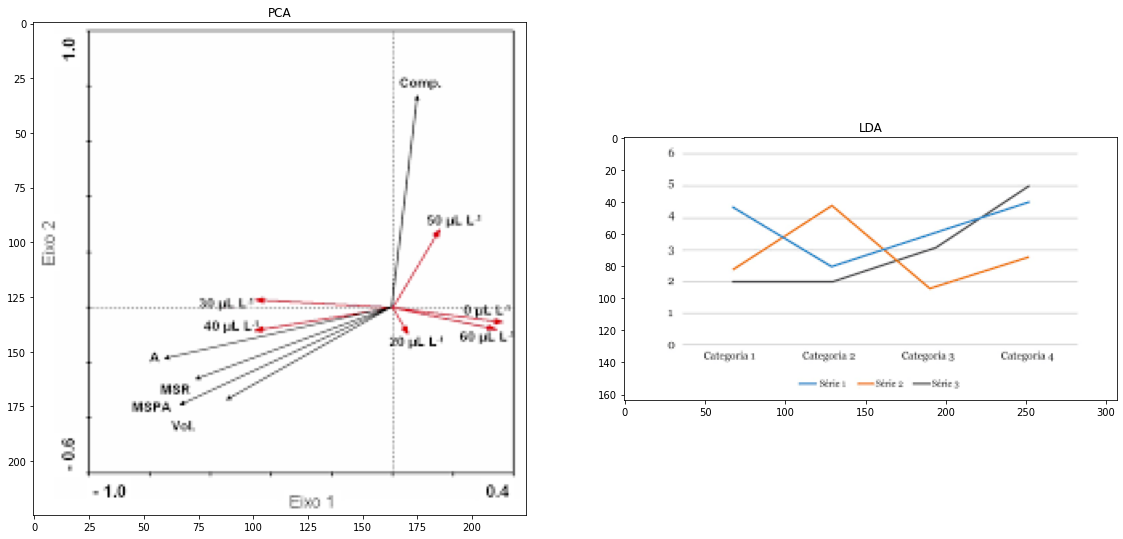

In [66]:
# Plotando as imagens 
fig = plt.figure (figsize = (30, 30)) 
fig.add_subplot (131) 
plt.title ("PCA") 
plt.imshow (grafico_pca)
fig.add_subplot (132) 
plt.title ("LDA") 
plt.imshow (grafico_lda)
plt.show ()